In [14]:
#importing libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt

In [4]:
#Open Dataset File from your computer and load it into Google Colab
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Advertising_data.csv to Advertising_data (1).csv
User uploaded file "Advertising_data (1).csv" with length 4097 bytes


In [6]:
df = pd.read_csv('Advertising_data.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,2210
1,44.5,39.3,45.1,1040
2,17.2,45.9,69.3,930
3,151.5,41.3,58.5,1850
4,180.8,10.8,58.4,1290


In [9]:
x=df.iloc[:,0:3]
y=df.iloc[:,-1]


,sales
0,2210
1,1040
2,930
3,1850
4,1290
...,...
195,760
196,970
197,1280
198,2550


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))   
model.add(layers.Dense(64, activation='relu'))  
model.add(layers.Dense(32, activation='relu'))   
model.add(layers.Dense(1))  # (Output Layer)


In [19]:
model.compile(optimizer='adam', loss='mse')

model.fit(x=x_train, y=y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 2239469.2500 - val_loss: 2195337.7500
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2219207.7500 - val_loss: 2194823.5000
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2383616.7500 - val_loss: 2194154.5000
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2315360.0000 - val_loss: 2193256.0000
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2178634.5000 - val_loss: 2192070.7500
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 2242781.0000 - val_loss: 2190478.5000
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2120799.0000 - val_loss: 2188360.7500
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2283438.7500 - val_loss: 2185502.0000
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2298002.7500 - val_loss: 2181681.7500
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2239868.2500 - val_loss: 2176587.0000
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0

<Axes: >

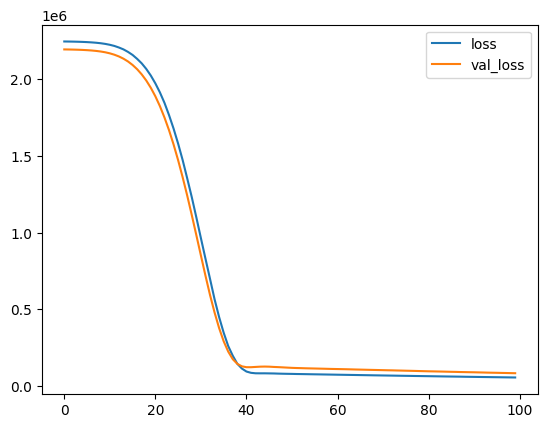

In [20]:
losses = pd.DataFrame(model.history.history)

losses.plot()